# Proyek Analisis Data: E-commerce-public-dataset
- Nama: Marshanda Tiana Sarjito
- Email: mrshndtianasarjito@gmail.com
- Id Dicoding: marshanda_tiana

# Menentukan Pertanyaan Bisnis
- Bagaimana performa penjualan dan revenue perusahaan?
- Apa saja produk yang paling banyak dan paling sedikit terjual?
- Apa saja produk yang paling banyak dan paling sedikit memberikan keuntungan/revenue?
- Bagaimana demografi customer dan seller?
- Bagaimana tingkat kepuasan pelanggan ? 
- Bagaimana penjualan dan revenue untuk masing-masing seller? seller mana saja yang memiliki penjualan dan revenue paling besar dan paling kecil?
- Produk mana saja yang memiliki rata-rata review score paling baik dan paling kecil?
- RFM analysis

# Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

#### Customer Data

In [2]:
customer_df = pd.read_csv("customers_dataset.csv")
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### Geolocation Dataset

In [3]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


#### Order Items Dataset

In [4]:
item_df = pd.read_csv("order_items_dataset.csv")
item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### Order Payments Dataset

In [5]:
payment_df = pd.read_csv("order_payments_dataset.csv")
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


#### Order Reviews Dataset

In [6]:
review_df = pd.read_csv("order_reviews_dataset.csv")
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Orders Dataset

In [7]:
order_df = pd.read_csv("orders_dataset.csv")
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Product Category Name Translation

In [8]:
translation_df = pd.read_csv("product_category_name_translation.csv")
translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Products Dataset

In [9]:
product_df = pd.read_csv("products_dataset.csv")
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### Sellers Dataset

In [10]:
seller_df = pd.read_csv("sellers_dataset.csv")
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


# Assesing Data

##  Customer Dataset

#### Menilai dataset

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Semua data dalam customer dataset sesuai dengan tipe data yang seharusnya dan tidak ada data null atau missing value.

#### Mencari jumlah missing value

In [12]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Untuk memastikan kembali tidak ada data null atau missing value pada customer dataset.

#### Mencari duplikasi data

In [13]:
customer_df.duplicated().sum()

0

Tidak ada duplikasi data pada customer dataset.

#### Melihat jumlah data unik

In [14]:
customer_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Jumlah data unik tersebut menunjukkan ada sejumlah data unik untuk masing-masing kolom data, contohnya terdapat 99441 customer_id berbeda dalam dataset dengan 27 customer_state yang berbeda.

#### Memeriksa parameter statistik

In [15]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Tidak ada hal yang menjanggal dari deskripsi customer dataset. 

## Geolocation Dataset

#### Menilai dataset

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak ada hal menjanggal dari informasi geolocation dataset terutama dari tipe data dan missing value atau data null.

#### Mencari missing value

In [17]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Untuk memastikan bahwa tidak ada missing value pada dataset.

#### Mencari duplikasi data

In [18]:
geolocation_df.duplicated().sum()

261831

Terdapat cukup banyak duplikasi data pada geolocation dataset>

#### Melihat data unik

In [19]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

#### Memeriksa parameter statistik

In [20]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Tidak ada kejanggalan pada paremeter statistik untuk geolocation dataset.

## Order Items Dataset

#### Menilai dataset

In [21]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Ada tipe data yang tidak sesuai yaitu kolom shipping_limit_date yang seharusnya tipe data datetime.

#### Mencari missing value

In [22]:
item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada missing value pada order items dataset.

#### Mencari duplikasi data

In [23]:
item_df.duplicated().sum()

0

Tidak ada duplikasi data pada order items dataset.

#### Memeriksa jumlah data unik

In [24]:
item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Memeriksa parameter statistik

In [25]:
item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak ada hal yang menjanggal dari deskripsi dataset diatas.

## Order Payments Dataset

#### Menilai dataset

In [26]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Semua tipe data sudah sesuai dan tidak ada missing value.

#### Mencari jumlah missing value

In [27]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak terdapat data null atau missing value pada order payments dataset.

#### Mencari duplikasi data

In [28]:
payment_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

#### Memeriksa jumlah data unik

In [29]:
payment_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

#### Memeriksa parameter statistik

In [30]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


## Order Reviews Dataset

#### Menilai dataset

In [31]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Semua tipe data sudah sesuai hanya saja ada missing value pada order reviews dataset.

#### Mencari jumlah missing value

In [32]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat banyak missing value pada kolom review_comment_title dan review_comment_message.

#### Mencari duplikasi data

In [33]:
review_df.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset.

#### Memeriksa jumlah data unik

In [34]:
review_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

#### Memeriksa parameter statistik

In [35]:
review_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Tidak ada kejanggalan dalam deskripsi dataset yang digunakan.

## Orders Dataset

#### Menilai dataset

In [36]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delevered_customer_date, dan order_estimated_delivery_date yang seharusnya tipe data datetime. Selain itu, terdapat missing value pada beberapa kolom data.

#### Mencari jumlah missing value

In [37]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat beberapa kolom data yang memiliki missing value.

#### Mencari duplikasi data

In [38]:
order_df.duplicated().sum()

0

Tidak ada duplikasi data pada orders dataset.

#### Memeriksa jumlah data unik

In [39]:
order_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

#### Memeriksa parameter statistik

In [40]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## Product Dataset

#### Menilai dataset

In [41]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat missing value pada beberapa kolom dataset.

#### Mencari missing value

In [42]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat 610 missing value untuk beberapa kolom product dataset.

#### Mencari duplikasi data

In [43]:
product_df.duplicated().sum()

0

Tidak ada duplikasi data dalam dataset.

#### Mencari jumlah data unik

In [44]:
product_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

#### Memeriksa parameter statistik

In [45]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


## Sellers Dataset

#### Menilai dataset

In [46]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak ada kesalahan tipe data dan tidak ada missing value.

#### Memeriksa missing value

In [47]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada missing value.

#### Mencari duplikasi data

In [48]:
seller_df.duplicated().sum()

0

Tidak ada duplikasi data pada sellers dataset.

#### Memeriksa jumlah data unik

In [49]:
seller_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

#### Memeriksa parameter statistik

In [50]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


# Cleaning Data

## Customers Dataset

Dari hasil assesing data, customers dataset tidak memiliki kesalahan atau kejanggalan pada data sehingga tidak memerlukan pembersihan atau cleaning data. 

## Geolocation Dataset

Dari hasil assesing data, dalam geolocation dataset terdapat duplikasi data yang perlu diatasi. Hal ini dilakukan dengan menghapus duplikasi data pada dataset menggunakan metode drop_duplicates().

In [51]:
geolocation_df.duplicated().sum()

261831

In [52]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

## Order Items Dataset

Pada dataset ini terdapat tipe data yang tidak sesuai pada kolom data shipping_limit_date.

In [53]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [54]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  item_df[column] = pd.to_datetime(item_df[column])

In [55]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Pada informasi diatas menunjukkan sudah ada perubahan tipe data kolom shipping_limit_date menjadi tipe data datetime.

## Order Payments Dataset

Tidak ada yang perlu yang ditangani pada dataset ini karena tidak ada masalah sepertin kesalahan tipe data, terdapat missing value, atau yang lainnya.

## Order Reviews Dataset

Dari hasil assesing data sebelumnya menunjukkan adanya missing value untuk dataset ini yaitu pada kolom review_comment_title dan review_comment_message.

In [56]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [57]:
review_df[review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Missing value pada dataset ini tidak akan ditangani karena kolom data review_comment_title dan review_comment_message tidak akan digunakan pada analisis data. 

## Orders Dataset

Dari assesing data yang dilakukan sebelumnya, dalam orders dataset terdapat tipe data dan missing value yang salah yang perlu ditangani.

In [58]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data untuk 5 kolom terakhir yang seharusnya merupakan tipe data datetime. 

In [59]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [60]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Sekarang tipe data untuk seluruh kolom sudah sesuai.

Selain itu, terdapat juga missing value pada orders dataset yang harus ditangani.

In [61]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [62]:
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Pada tahap ini, missing value pada orders dataset tidak akan ditangani dulu karena melihat analisis data nanti.

## Products Dataset

Terdapat missing value pada products dataset yang perlu ditangani.

In [63]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [64]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


- Terdapat 610 missing value untuk kolom product_category_name, prdouct_name_lenght, product_description_lenght, dan product_photos_qty juga terdapat dua missing value pada 4 kolom terakhir. 
- Pada analisis data akan digunakan data product dengan menggunakan product_category_name_english sehingga cleaning data akan dilakukan setelah assesing data untuk data product yang baru yaitu data dengan menggunakan nama produk dalam bahasa inggris. 

## Sellers Dataset

Pada sellers dataset tidak ada yang perlu ditangani dalam tahap cleaning data.

# Exploratory Data Analysis

### Membuat products dataset baru

Pertama-tama akan dilakukan penggabungan dua dataset yaitu products_df dengan translation_df untuk menghasilkan products dataset baru.

In [65]:
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [66]:
translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [67]:
product_df = pd.merge(
    left=translation_df,
    right=product_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...
32323,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32324,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32325,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32326,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


In [68]:
product_df.rename(columns={
    "product_category_name_english": "product_name"
}, inplace=True)
product_df = product_df[['product_name', 'product_id',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']]
product_df

,product_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...
32323,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32324,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32325,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32326,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


Sekarang terdapat dataset baru dengan nama yang sama yaitu product_df tetapi dengan isi data yang berbeda karena pada analisis data yang dilakukan akan mengacu pada nama produk dalam Bahasa Inggris.

#### Menilai dataset

In [69]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_name                32328 non-null  object 
 1   product_id                  32328 non-null  object 
 2   product_name_lenght         32328 non-null  float64
 3   product_description_lenght  32328 non-null  float64
 4   product_photos_qty          32328 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Tidak terdapat kesalahan pada tipe data yang ditampilkan hanya saja sepertinya ada missing value.

#### Memeriksa missing value

In [70]:
product_df.isna().sum()

product_name                  0
product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [71]:
product_df[product_df.product_weight_g.isna()]

,product_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20553,baby,09ff539a621711667c43eba6a3bd8466,60.0,865.0,3.0,NaN,NaN,NaN,NaN


#### Melihat patameter statistik

In [72]:
product_df.describe(include="all")

,product_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32328,32328,32328.000000,32328.000000,32328.000000,32327.000000,32327.000000,32327.000000,32327.000000
unique,71,32328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bed_bath_table,e3e020af31d4d89d2602272b315c3f6e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3029,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.474078,771.520168,2.188815,2276.960807,30.856498,16.955950,23.208464
std,NaN,NaN,10.246388,635.180062,1.736746,4279.734063,16.958460,13.637246,12.080665
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000


Dikarenakan hanya ada satu missing value pada product dataset dan sepertinya tidak memengaruhi deskripsi paremeter statistik dan tidak akan mengganggu proses analisis data maka tidak akan dilakukan penanganan untuk missing value.

## Eksplorasi Customers Dataset

In [73]:
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [74]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [75]:
customer_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

#### Melihat list customer_city

In [76]:
customer_df.groupby(by="customer_city").customer_id.nunique()

customer_city
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             11
abaiara                 2
                       ..
xinguara                9
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Name: customer_id, Length: 4119, dtype: int64

#### Melihat list customer_state

In [77]:
customer_df.groupby(by="customer_state").customer_id.nunique()

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: customer_id, dtype: int64

Customer tersebar di 27 state dan 4119 city.

## Eksplorasi Order Items Dataset

In [78]:
item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [79]:
item_df.describe(include="all")

C:\Users\PC-HP\AppData\Local\Temp\ipykernel_8208\1872800424.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  item_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


- Dari deskripsi dataset diatas menunjukkan price atau harga barang yang dibeli customer memiliki nilai terendah sebesar 0.85 mata uang Brazil dan nilai tertinggi sebesar 6735 mata uang Brazil dengan price rata-rata sebesar 120.654 mata uang Brazil.
- Selain itu, deskripsi dataset diatas juga menunjukkan freight value atau biaya pengiriman yang dibayarkan oleh customer memiliki nilai terendah sebesar 0 mata uang Brazil dan terbesar sebesar 409.68 mata uang Brazil dengan freight value rata-rata 19.9 mata uang Brazil.

## Eksplorasi Order Payments Dataset

In [80]:
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [81]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


- Dari payment_installments menunjukkan rata-rata customer melakukan pembayaran angsuran selama 2.8 bulan (?) dengan maksimum angsuran yang didapatkan adalah dua tahun. (?)
- Dari payment value menunjukkan rata-rata harga pesanan (price + freight value) yang dibayar adalah sebesar 154 mata uang Brazil dan maksimum harga 13664 mata uang Brazil.

In [82]:
payment_df.groupby(by="payment_type").order_id.nunique()

payment_type
boleto         19784
credit_card    76505
debit_card      1528
not_defined        3
voucher         3866
Name: order_id, dtype: int64

In [83]:
payment_df.groupby(by="payment_installments").order_id.nunique()

payment_installments
0         2
1     49060
2     12389
3     10443
4      7088
5      5234
6      3916
7      1623
8      4253
9       644
10     5315
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: order_id, dtype: int64

## Eksplorasi Order Reviews Dataset

In [84]:
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [85]:
review_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Rata-rata review score yang diterima adalah sebesar 4.08 dengan nilai review paling kecil adalah 1 dan paling besar adalah 5.

In [86]:
review_df.groupby(by="review_score").order_id.nunique()

review_score
1    11393
2     3148
3     8160
4    19098
5    57076
Name: order_id, dtype: int64

In [87]:
review_df.groupby(by="review_score").review_id.nunique()

review_score
1    11282
2     3114
3     8097
4    19007
5    56910
Name: review_id, dtype: int64

Informasi diatas menunjukkan banyaknya customer yang memberikan penilaian pada barang yang dibeli sesuai order_id dan review_id.

## Eksplorasi Orders Dataset

In [88]:
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [89]:
order_df.describe(include="all")

C:\Users\PC-HP\AppData\Local\Temp\ipykernel_8208\525495741.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


- Pesanan pertama yang dibuat pada orders dataset dilakukan pada 15 September 2016 dan pesanan terakhir pada 3 September 2018.
- Pesanan pertama yang sampai tercatat pada tanggal 11 Oktober 2016 dan pesanan terakhir sampai di customer adalah 17 Oktober 2018.

In [90]:
order_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Terdapat 8 jenis order status pada dataset dengan masing-masing jenis order status dan banyaknya order_id pada masing-masing jenis ditampilkan berikut ini.

In [91]:
order_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [92]:
order_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False).reset_index()

,order_status,customer_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


#### Membuat kolom baru dalam orders dataset

Kolom pertama yaitu kolom delivery_time yang menunjukkan berapa lama (hari) pesanan customer diantar yang dihitung dari waktu pembelian sampai pesanan diterima customer.

In [93]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


Kolom kedua yaitu kolom delivery_estimated_time yang menunjukkan waktu estimasi (dalam hari) pesanan akan sampai di customer.

In [94]:
delivery_estimated_time = order_df["order_estimated_delivery_date"] - order_df["order_purchase_timestamp"]
delivery_estimated_time = delivery_estimated_time.apply(lambda x: x.total_seconds())
order_df["delivery_estimated_time"] = round(delivery_estimated_time/86400)
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,19.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0


Kolom ketiga yaitu kolom diff_time yang menunjukkan selisih atau perbedaan antara kolom delivery_estimated_time dengan delivery_time yang mana nanti dapat diidentifikasi apakah ada pesanan yang telat sampai di customer ataupun kejanggalan lainnya.

In [95]:
diff_time = order_df["delivery_estimated_time"] - order_df["delivery_time"]
order_df["diff_time"] = diff_time
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,19.0,11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,20.0


In [96]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  96476 non-null  float64       
 9   delivery_estimated_time        99441 non-null  float64       
 10  diff_time                      96476 non-null  float64       
dtypes: datetime64[n

In [97]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_time                    2965
delivery_estimated_time             0
diff_time                        2965
dtype: int64

In [98]:
order_df.describe()

,delivery_time,delivery_estimated_time,diff_time
count,96476.000000,99441.000000,96476.000000
mean,12.517548,23.675265,11.128115
std,9.550516,8.840757,10.195144
min,1.000000,2.000000,-189.000000
25%,7.000000,18.000000,7.000000
50%,10.000000,23.000000,12.000000
75%,16.000000,28.000000,16.000000
max,210.000000,155.000000,146.000000


Ada beberapa hal yang menjadi perhatian:
- Nilai maksimum pada kolom delivery_time terhitung cukup besar yaitu 210 hari.
- Nilai maksimum pada kolom delivery_estimated_time juga terhitung cukup besar yaitu 155 hari.
- Nilai minimum pada kolom diff_time menunjukkan -189 hari.
- Nilai maksimum pada kolom diff_time menunjukkan 146 hari.

In [99]:
order_df[order_df.delivery_time == order_df.delivery_time.max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,210.0,28.0,-182.0


Data diatas menunjukkan data order yang memiliki nilai delivery_time maksimum yaitu selama 210 hari. Hal ini ternyata memang benar dan ditunjukkan dengan order_delivered_custome_date pada bulan September 2017 sedangkan customer melakukan pembelian pada bulan februari 2017 dan diestimasikan sampai di customer pada bulan Maret 2017 selama 28 hari setelah pembelian.

In [100]:
order_df[order_df.delivery_estimated_time == order_df.delivery_estimated_time.max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
57160,eec7f369423b033e549c02f3c5381205,32cef4bdd6bfa50612d81dc77a93b131,delivered,2018-02-06 20:44:56,2018-02-08 10:10:31,2018-02-15 20:42:12,2018-02-27 16:35:43,2018-07-12,21.0,155.0,134.0


Data diatas menunjukkan data order yang memiliki delivery_estimated_time paling lama yaitu 155 hari. Hal ini ditunjukkan dengan order_estimated_delivery_time pada Juli 2018 sedangkan pembelian dilakukan pada bulan Februari 2018 dan sampai setelah 21 hari pembelian.

In [101]:
order_df[order_df.diff_time == order_df.diff_time.max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
40094,0607f0efea4b566f1eb8f7d3c2397320,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-06 09:47:07,2018-03-06 09:55:47,2018-03-07 21:33:39,2018-03-09 23:36:47,2018-08-03,4.0,150.0,146.0


Data diatas menunjukkan perbedaan terbesar antara delivery_estimated_time dan delivery_time yaitu selama 146 hari. Order diestimasikan datang pada bulan Agustus 2018 dengan pembelian dilakukan pada Maret 2018 dan barang sampai hanya selama 4 hari.

In [102]:
order_df[order_df.diff_time == order_df.diff_time.min()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0,19.0,-189.0


Data diatas merupakan data dengan nilai terkecil pada kolom diff_time yaitu -189 yang menunjukkan bahwa pesanan customer sampai jauh lebih lama dari waktu estimasi yang seharusnya. Waktu pembelian pada bulan Februari 2018 dengan estimasi sampai di customer selama 19 hari yaitu Maret 2018 sedangkan secara data pesanan sampai pada September 2019 yaitu 208 hari setelah pembelian dan 189 hari setelah waktu estimasi.

## Eksplorasi Products Dataset

In [103]:
product_df

,product_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...
32323,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32324,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32325,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32326,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


In [104]:
product_df.isna().sum()

product_name                  0
product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [105]:
product_df.describe(include="all")

,product_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32328,32328,32328.000000,32328.000000,32328.000000,32327.000000,32327.000000,32327.000000,32327.000000
unique,71,32328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bed_bath_table,e3e020af31d4d89d2602272b315c3f6e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3029,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.474078,771.520168,2.188815,2276.960807,30.856498,16.955950,23.208464
std,NaN,NaN,10.246388,635.180062,1.736746,4279.734063,16.958460,13.637246,12.080665
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000


- Dari kolom product_weight_g menunjukkan berat produk rata-rata 2276.9 gram, berat terkecil yaitu 0 gram, dan berat terbesar 40425 gram.
- Dari kolom product_lenght_cm menunjukkan panjang produk rata-rata 30.8 cm, panjang terkecil 7 cm, dan panjang terbesar adalah 105 cm.
- Dari kolom product_height_cm menunjukkan tinggi produk rata-rata  16.9 cm, terkecil 2 cm, dan tertinggi 105 cm.
- Dari kolom product_widht_cm menunjukkan lebar produk rata-rata 23.3 cm, terkecil 6 cm, dan terbesar 118 cm.

In [106]:
product_df.groupby(by="product_name").product_id.nunique().reset_index()

,product_name,product_id
0,agro_industry_and_commerce,74
1,air_conditioning,124
2,art,55
3,arts_and_craftmanship,19
4,audio,58
...,...,...
66,stationery,849
67,tablets_printing_image,9
68,telephony,1134
69,toys,1411


Informasi diatas menunjukkan jumlah produk masing-masing kategori produk.

In [107]:
product_df.groupby(by="product_name").product_weight_g.mean().reset_index()

,product_name,product_weight_g
0,agro_industry_and_commerce,5263.405405
1,air_conditioning,4459.959677
2,art,1691.763636
3,arts_and_craftmanship,1164.578947
4,audio,641.637931
...,...,...
66,stationery,1763.113074
67,tablets_printing_image,381.444444
68,telephony,236.506173
69,toys,1869.356485


Informasi diatas menunjukkan berat rata-rata untuk masing-masing kategori produk.

## Eksplorasi Sellers Dataset

In [108]:
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [109]:
seller_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [110]:
seller_df.groupby(by="seller_city").seller_id.nunique().reset_index()

,seller_city,seller_id
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


In [111]:
seller_df.groupby(by="seller_state").seller_id.nunique().reset_index()

,seller_state,seller_id
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


Seller tersebar kedalam 23 state dan tersebar lagi kedalam 611 city.

## Eksploarasi Data Secara Keseluruhan

### Menggabungkan Customers Dataset dan Orders Dataset

In [112]:
customer_order_df = pd.merge(
    left=customer_df,
    right=order_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,diff_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,9.0,19.0,10.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,17.0,24.0,7.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,24.0,-2.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,15.0,27.0,12.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,17.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,17.0,11.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,16.0,9.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,31.0,23.0,-8.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,13.0,31.0,18.0


In [113]:
customer_order_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


Melakukan pengelompokkan data berdasarkan customer_city dan meninjau berapa banyak order_id untuk masing-masing kota. Dari informasi diatas Kota Sao Paulo memiliki jumlah order_id terbanyak diantara kota lainnya.

In [114]:
customer_order_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Melakukan pengelompokkan data berdasarkan customer_state dan meninjau berapa banyak order_id untuk masing-masing state. Dari informasi diatas State Sao Paulo (SP) memiliki jumlah order_id terbanyak diantara state lainnya.

In [115]:
customer_order_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False).reset_index()

,order_status,customer_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Melakukan pengelompokkan data berdasarkan order_status dan melihat berapa banyak customer_id dengan order_status tertentu.

### Menggabungkan Order Items Dataset dan Products Datase

In [116]:
item_product_df = pd.merge(
    left=item_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [117]:
item_product_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name                  1627
product_name_lenght           1627
product_description_lenght    1627
product_photos_qty            1627
product_weight_g              1628
product_length_cm             1628
product_height_cm             1628
product_width_cm              1628
dtype: int64

In [118]:
item_product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "seller_id":"nunique",
    "price": "sum",
    "freight_value":"sum"
})

,product_id,order_id,seller_id,price,freight_value
product_name,,,,,
agro_industry_and_commerce,74,182,34,72530.47,5843.60
air_conditioning,124,253,52,55024.96,6749.23
art,55,202,36,24202.64,4045.17
arts_and_craftmanship,19,23,13,1814.01,370.13
audio,58,350,36,50688.50,5710.44
...,...,...,...,...,...
stationery,849,2311,173,230943.23,46798.48
tablets_printing_image,9,79,6,7528.41,1226.20
telephony,1134,4199,149,323667.53,71215.79


In [119]:
item_product_df.groupby(by="product_name").agg({
    "price":  ["min", "max"],
    "freight_value": ["min","max"]
})

price          freight_value        
                              min      max           min     max
product_name                                                    
agro_industry_and_commerce  12.99  2990.00          7.39  194.55
air_conditioning            10.90  1599.00          6.58  115.43
art                          3.50  6499.00          7.39  227.66
arts_and_craftmanship        9.80   289.49          7.39   68.72
audio                       14.90   598.99          4.25   52.67
...                           ...      ...           ...     ...
stationery                   2.29  1693.00          0.04  222.38
tablets_printing_image      14.90   889.99          1.71   34.49
telephony                    5.00  2428.00          0.01  121.22
toys                         4.90  1699.99          0.01  193.76
watches_gifts                8.99  3999.90          0.00  209.63

[71 rows x 4 columns]

### Menggabungkan item_product_df dengan order payments dataset

In [120]:
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [121]:
item_product_payment_df = pd.merge(
    left=item_product_df,
    right=payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
item_product_payment_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,boleto,1.0,343.40
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1.0,boleto,1.0,386.53
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0,1.0,credit_card,3.0,116.85
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,1.0,credit_card,3.0,64.71


In [122]:
item_product_payment_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name                  1723
product_name_lenght           1723
product_description_lenght    1723
product_photos_qty            1723
product_weight_g              1724
product_length_cm             1724
product_height_cm             1724
product_width_cm              1724
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64

In [123]:
item_product_payment_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "seller_id":"nunique",
    "price": "sum",
    "freight_value":"sum",
    "payment_value":"sum"
    
})

,product_id,order_id,seller_id,price,freight_value,payment_value
product_name,,,,,,
agro_industry_and_commerce,74,182,34,83841.95,6966.82,118730.61
air_conditioning,124,253,52,55962.38,6848.50,91170.66
art,55,202,36,24721.97,4191.02,30992.93
arts_and_craftmanship,19,23,13,1814.01,370.13,2326.17
audio,58,350,36,52450.37,5979.79,60324.62
...,...,...,...,...,...,...
stationery,849,2311,173,239028.99,48831.01,317440.07
tablets_printing_image,9,79,6,7840.31,1300.37,10042.93
telephony,1134,4199,149,339399.16,74165.16,486882.05


In [124]:
item_product_payment_df.groupby(by="product_name").agg({
    "price":  ["min", "max"],
    "freight_value": ["min","max"],
    "payment_value":["min","max"]
})

price          freight_value          \
                              min      max           min     max   
product_name                                                       
agro_industry_and_commerce  12.99  2990.00          7.39  194.55   
air_conditioning            10.90  1599.00          6.58  115.43   
art                          3.50  6499.00          7.39  227.66   
arts_and_craftmanship        9.80   289.49          7.39   68.72   
audio                       14.90   598.99          4.25   52.67   
...                           ...      ...           ...     ...   
stationery                   2.29  1693.00          0.04  222.38   
tablets_printing_image      14.90   889.99          1.71   34.49   
telephony                    5.00  2428.00          0.01  121.22   
toys                         4.90  1699.99          0.01  193.76   
watches_gifts                8.99  3999.90          0.00  209.63   

                           payment_value           
                                     min      max  
product_name                                       
agro_industry_and_commerce          2.35  6081.54  
air_conditioning                   26.00  1642.54  
art                                 5.54  6726.66  
arts_and_craftmanship              23.88   314.32  
audio                               0.70  1506.05  
...                                  ...      ...  
stationery                          0.00  1784.20  
tablets_printing_image             10.70   912.79  
telephony                           0.01  2457.44  
toys                                0.01  1782.55  
watches_gifts                       0.23  4445.50  

[71 rows x 6 columns]

In [125]:
item_product_payment_df.groupby(by="payment_type").product_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,product_id
0,credit_card,28428
1,boleto,10540
2,voucher,3143
3,debit_card,1366


In [126]:
item_product_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,75991
1,boleto,19614
2,voucher,3766
3,debit_card,1521


In [127]:
item_product_payment_df.groupby(by="payment_type").seller_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,seller_id
0,credit_card,2951
1,boleto,2010
2,voucher,1046
3,debit_card,679


In [128]:
item_product_payment_df.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": "sum",
    "freight_value":"sum",
    "payment_value":"sum"
    
})

,product_id,order_id,price,freight_value,payment_value
seller_id,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,3,2685.00,63.06,2748.06
001cca7ae9ae17fb1caed9dfb1094831,11,200,25248.93,8926.45,48349.22
001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94,267.94
002100f778ceb8431b7a1020ff7ab48f,24,51,1283.20,825.52,2445.64
003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38,139.38
...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1,69.90,9.62,79.52
ffdd9f82b9a447f6f8d4b91554cc7dd3,12,18,2140.80,743.93,3607.52
ffeee66ac5d5a62fe688b9d26f83f534,3,14,1839.86,419.69,2259.55


### Menggabungkan Order Items Dataset dan Sellers Dataset

In [129]:
item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [130]:
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [131]:
item_seller_df = pd.merge(
    left=seller_df,
    right=item_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89
...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.00,16.05
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.00,10.96
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.00,16.05
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.00,12.48


In [132]:
item_seller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   seller_id               112650 non-null  object        
 1   seller_zip_code_prefix  112650 non-null  int64         
 2   seller_city             112650 non-null  object        
 3   seller_state            112650 non-null  object        
 4   order_id                112650 non-null  object        
 5   order_item_id           112650 non-null  int64         
 6   product_id              112650 non-null  object        
 7   shipping_limit_date     112650 non-null  datetime64[ns]
 8   price                   112650 non-null  float64       
 9   freight_value           112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 9.5+ MB


In [133]:
item_seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
order_id                  0
order_item_id             0
product_id                0
shipping_limit_date       0
price                     0
freight_value             0
dtype: int64

In [134]:
item_seller_df.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": "sum",
    "freight_value":"sum"
    
})

,product_id,order_id,price,freight_value
seller_id,,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,3,2685.00,63.06
001cca7ae9ae17fb1caed9dfb1094831,11,200,25080.03,8854.14
001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94
002100f778ceb8431b7a1020ff7ab48f,24,51,1234.50,793.66
003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38
...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1,69.90,9.62
ffdd9f82b9a447f6f8d4b91554cc7dd3,12,18,2101.20,727.46
ffeee66ac5d5a62fe688b9d26f83f534,3,14,1839.86,419.69


#### Menggabungkan item_seller_df dengan Products Dataset

In [135]:
item_seller_product_df = pd.merge(
    left=item_seller_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
item_seller_product_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,sports_leisure,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,sports_leisure,27.0,485.0,2.0,600.0,35.0,15.0,28.0
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,sports_leisure,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,luggage_accessories,21.0,769.0,4.0,1600.0,55.0,37.0,30.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,stationery,30.0,832.0,5.0,2000.0,25.0,55.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.00,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.00,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.00,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27.00,12.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Menggabungkan item_product_df dengan Orders Dataset

In [136]:
item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [137]:
order_item_product_df = pd.merge(
    left=order_df,
    right=item_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_item_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,...,price,freight_value,product_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,...,118.70,22.76,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,...,159.90,19.22,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0,...,19.90,8.72,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0,...,174.90,20.10,baby,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0,...,205.99,65.02,home_appliances_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,179.99,40.59,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,179.99,40.59,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [138]:
order_item_product_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
delivery_time                    3229
delivery_estimated_time             0
diff_time                        3229
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_name                     2402
product_name_lenght              2402
product_description_lenght       2402
product_photos_qty               2402
product_weight_g                 2403
product_length_cm                2403
product_height_cm                2403
product_width_cm                 2403
dtype: int64

### Menggabungkan Orders, Order Items, Products, dan Order Payment Dataset

In [139]:
order_item_product_payment_df = pd.merge(
    left=order_item_product_df,
    right=payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_item_product_payment_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,...,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,...,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0,...,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0,...,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,credit_card,5.0,271.01
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16


In [140]:
order_item_product_payment_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
delivery_time                    3397
delivery_estimated_time             0
diff_time                        3397
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_name                     2553
product_name_lenght              2553
product_description_lenght       2553
product_photos_qty               2553
product_weight_g                 2554
product_length_cm                2554
product_height_cm                2554
product_width_cm                 2554
payment_sequential                  3
payment_type

In [141]:
order_item_product_payment_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "customer_id":"nunique",
    "seller_id":"nunique",
    "price": "sum",
    "freight_value":"sum",
    "payment_value":"sum"
    
})

,product_id,order_id,customer_id,seller_id,price,freight_value,payment_value
product_name,,,,,,,
agro_industry_and_commerce,74,182,182,34,83841.95,6966.82,118730.61
air_conditioning,124,253,253,52,55962.38,6848.50,91170.66
art,55,202,202,36,24721.97,4191.02,30992.93
arts_and_craftmanship,19,23,23,13,1814.01,370.13,2326.17
audio,58,350,350,36,52450.37,5979.79,60324.62
...,...,...,...,...,...,...,...
stationery,849,2311,2311,173,239028.99,48831.01,317440.07
tablets_printing_image,9,79,79,6,7840.31,1300.37,10042.93
telephony,1134,4199,4199,149,339399.16,74165.16,486882.05


### Menggabungkan Orders, Order Item, Products, Order Payments, dan Order Reviews Dataset

In [142]:
all_df = pd.merge(
    left=order_item_product_payment_df,
    right=review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0,...,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0,...,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [143]:
all_df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
delivery_time                      3421
delivery_estimated_time               0
diff_time                          3421
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_name                       2567
product_name_lenght                2567
product_description_lenght         2567
product_photos_qty                 2567
product_weight_g                   2568
product_length_cm                  2568
product_height_cm                  2568
product_width_cm                   2568


In [144]:
all_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "customer_id":"nunique",
    "seller_id":"nunique",
    "price": "sum",
    "freight_value":"sum",
    "payment_value":"sum",
    "review_score":"mean"
    
})

,product_id,order_id,customer_id,seller_id,price,freight_value,payment_value,review_score
product_name,,,,,,,,
agro_industry_and_commerce,74,182,182,34,83841.95,6966.82,118730.61,4.150794
air_conditioning,124,253,253,52,55962.38,6848.50,91170.66,3.969697
art,55,202,202,36,24721.97,4191.02,30992.93,3.935484
arts_and_craftmanship,19,23,23,13,1814.01,370.13,2326.17,4.125000
audio,58,350,350,36,52500.27,5993.89,60388.62,3.840849
...,...,...,...,...,...,...,...,...
stationery,849,2311,2311,173,239385.97,48956.47,318105.09,4.188339
tablets_printing_image,9,79,79,6,7840.31,1300.37,10042.93,4.117647
telephony,1134,4199,4199,149,339571.03,74300.95,487189.71,3.948849


In [145]:
all_df.groupby(by="review_score").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "customer_id":"nunique",
    "seller_id":"nunique",
    "review_id":"nunique",
    "price": "sum",
    "freight_value":"sum",
    "payment_value":"sum"
    
})

,product_id,order_id,customer_id,seller_id,review_id,price,freight_value,payment_value
review_score,,,,,,,,
1.0,7484,11393,11393,1774,11282,1899702.72,317007.99,3572902.46
2.0,2622,3148,3148,929,3114,477229.47,85342.59,796261.23
3.0,5627,8160,8160,1420,8097,1073988.32,199177.16,1660610.82
4.0,10542,19098,19098,1980,19007,2652600.52,449050.05,3648468.83
5.0,23212,57076,57076,2700,56910,8037615.26,1299238.93,10666458.37


# Data Visualization & Explanatory Analysis

## 1. Bagaimana performa penjualan dan revenue perusahaan?

In [146]:
monthly_orders_df = order_item_product_payment_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price":"sum",
    "freight_value":"sum",
    "payment_value":"sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
monthly_orders_df

,order_purchase_timestamp,order_count,price,freight_value,payment_value
0,2016-09,4,267.36,87.39,388.47
1,2016-10,324,50942.23,7607.80,76120.17
2,2016-11,0,0.00,0.00,0.00
3,2016-12,1,10.90,8.72,19.62
4,2017-01,800,128637.99,17817.55,189015.66
5,2017-02,1780,260753.86,41476.51,349701.93
6,2017-03,2682,396451.04,61331.25,544738.23
7,2017-04,2404,391784.42,56958.36,510891.55
8,2017-05,3700,545340.65,84749.23,731017.09
9,2017-06,3245,453031.41,73464.50,608891.38


In [147]:
monthly_orders_df.describe()

,order_count,price,freight_value,payment_value
count,26.000000,2.600000e+01,26.000000,2.600000e+01
mean,3824.653846,5.465096e+05,90670.653846,7.873356e+05
std,2758.007454,3.889412e+05,66401.058744,5.710763e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1045.000000,1.616670e+05,23732.290000,2.291872e+05
50%,4155.500000,5.733752e+05,96431.935000,8.103644e+05
75%,6457.000000,9.030802e+05,158679.932500,1.308117e+06
max,7544.000000,1.046128e+06,178607.080000,1.599444e+06


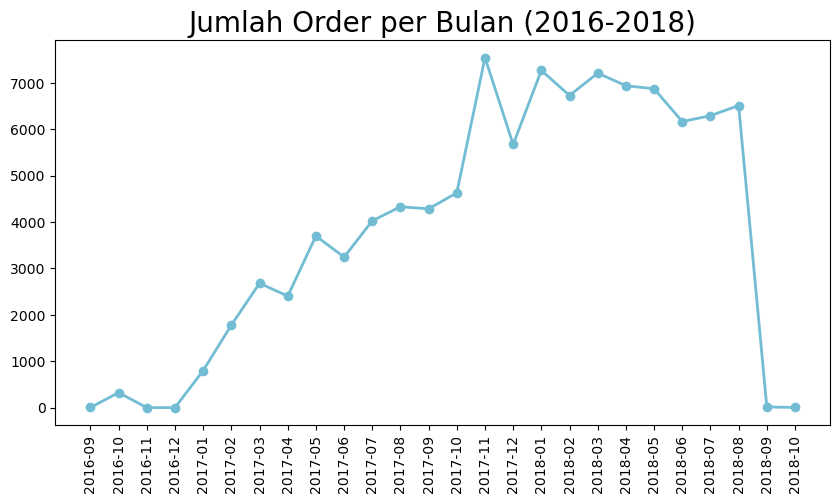

In [148]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Jumlah Order per Bulan (2016-2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.xticks(rotation=90)
plt.yticks(fontsize=10) 
plt.show()

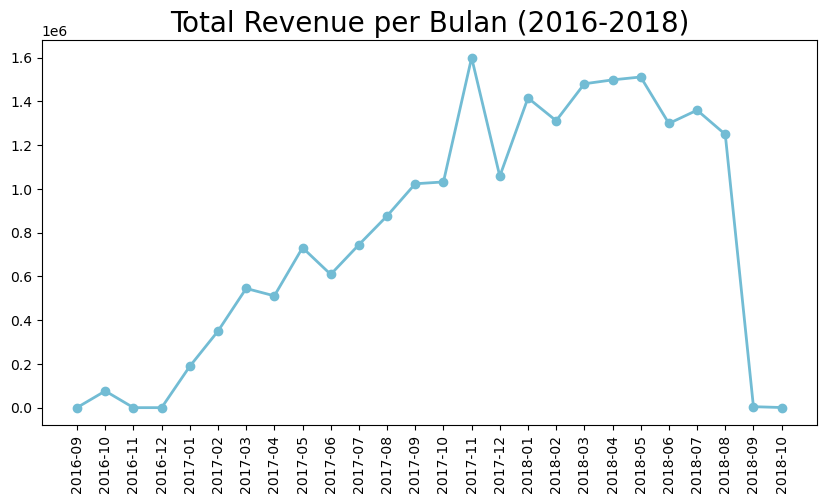

In [149]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["payment_value"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Bulan (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()

## 2. Apa saja produk yang paling banyak dan paling sedikit terjual?

In [150]:
sum_order_item_df = order_item_product_payment_df.groupby("product_name").order_id.count().reset_index()
sum_order_item_df

,product_name,order_id
0,agro_industry_and_commerce,252
1,air_conditioning,302
2,art,219
3,arts_and_craftmanship,24
4,audio,380
...,...,...
66,stationery,2617
67,tablets_printing_image,87
68,telephony,4721
69,toys,4273


In [151]:
sum_order_item_df.describe()

,order_id
count,71.000000
mean,1632.126761
std,2723.262979
min,2.000000
25%,96.000000
50%,298.000000
75%,1903.000000
max,11823.000000


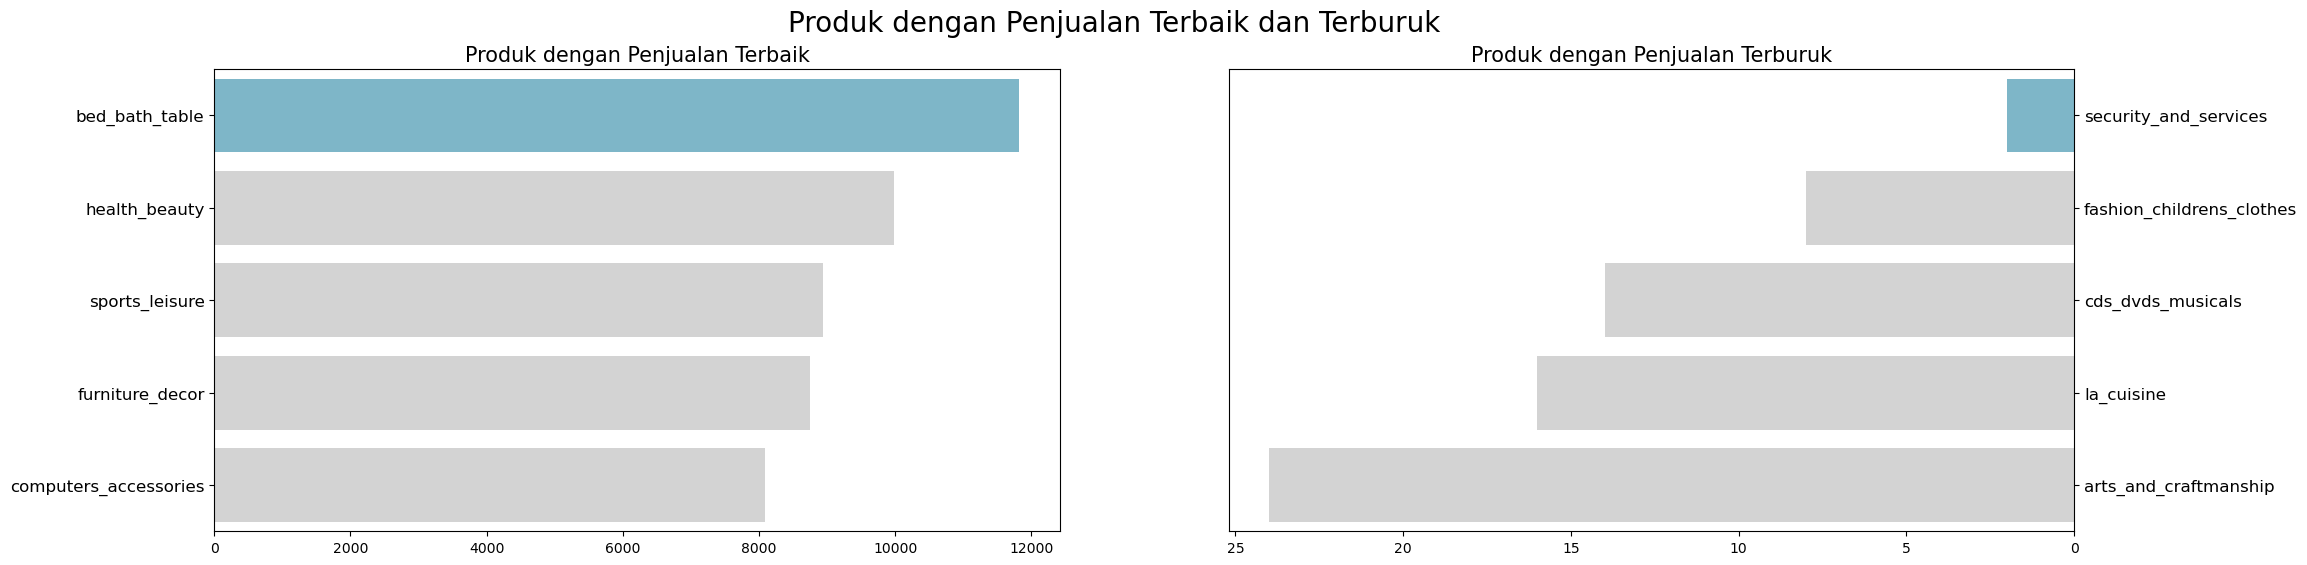

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="product_name", data=sum_order_item_df.sort_values(by="order_id",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_id", y="product_name", data=sum_order_item_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Produk dengan Penjualan Terbaik dan Terburuk", fontsize=20)
plt.show()

## 3. Apa saja produk yang paling banyak dan paling sedikit memberikan revenue?

In [153]:
sum_order_revenue_df = order_item_product_payment_df.groupby("product_name").payment_value.sum().reset_index()
sum_order_revenue_df

,product_name,payment_value
0,agro_industry_and_commerce,118730.61
1,air_conditioning,91170.66
2,art,30992.93
3,arts_and_craftmanship,2326.17
4,audio,60324.62
...,...,...
66,stationery,317440.07
67,tablets_printing_image,10042.93
68,telephony,486882.05
69,toys,619037.69


In [154]:
sum_order_revenue_df.describe()

,payment_value
count,7.100000e+01
mean,2.823778e+05
std,4.502793e+05
min,3.245100e+02
25%,1.500276e+04
50%,7.142965e+04
75%,2.694893e+05
max,1.712554e+06


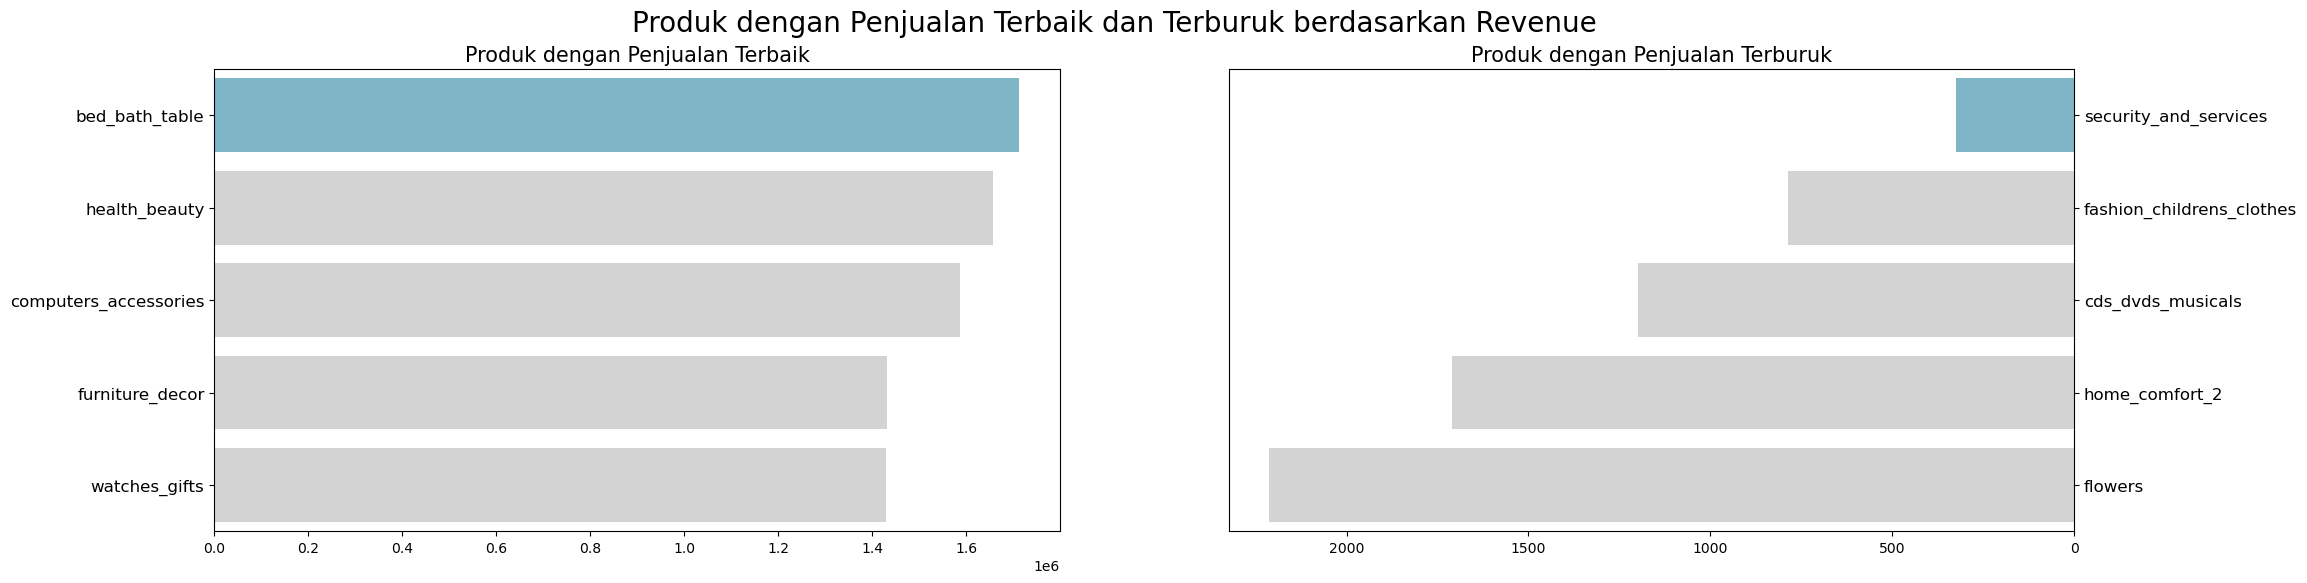

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="payment_value", y="product_name", data=sum_order_revenue_df.sort_values(by="payment_value",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="payment_value", y="product_name", data=sum_order_revenue_df.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Produk dengan Penjualan Terbaik dan Terburuk berdasarkan Revenue", fontsize=20)
plt.show()

## 4. Bagaimana demografi customer dan seller?

In [156]:
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [157]:
customer_city_df = customer_df.groupby("customer_city").customer_id.count().reset_index()
customer_city_df

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


In [158]:
customer_city_df.describe()

,customer_id
count,4119.000000
mean,24.142025
std,279.272382
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,15540.000000


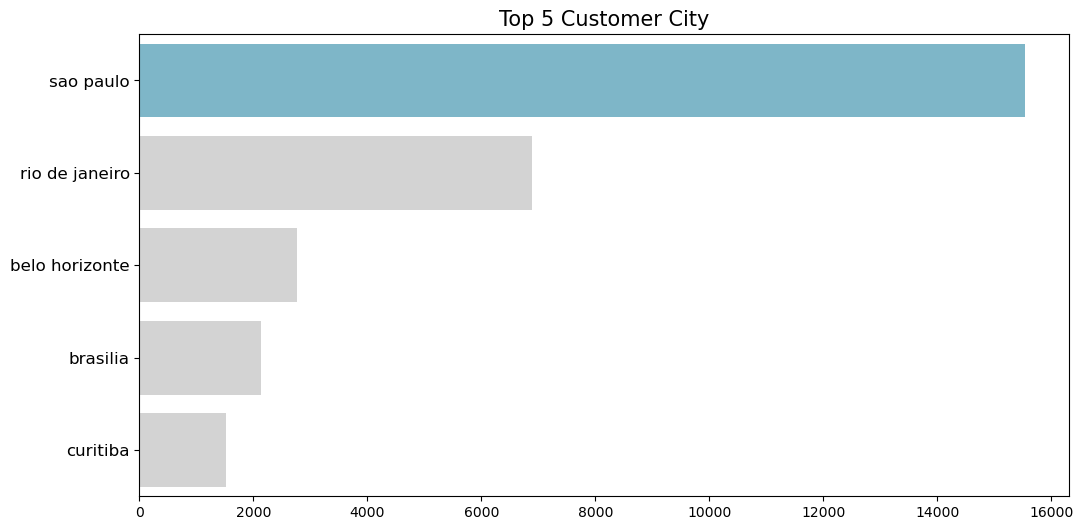

In [159]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_id", y="customer_city", data=customer_city_df.sort_values(by="customer_id", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Top 5 Customer City", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

In [160]:
customer_state_df = customer_df.groupby("customer_state").customer_id.count().reset_index()
customer_state_df

,customer_state,customer_id
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [161]:
customer_state_df.describe()

,customer_id
count,27.000000
mean,3683.000000
std,8270.437664
min,46.000000
25%,381.500000
50%,907.000000
75%,2760.000000
max,41746.000000


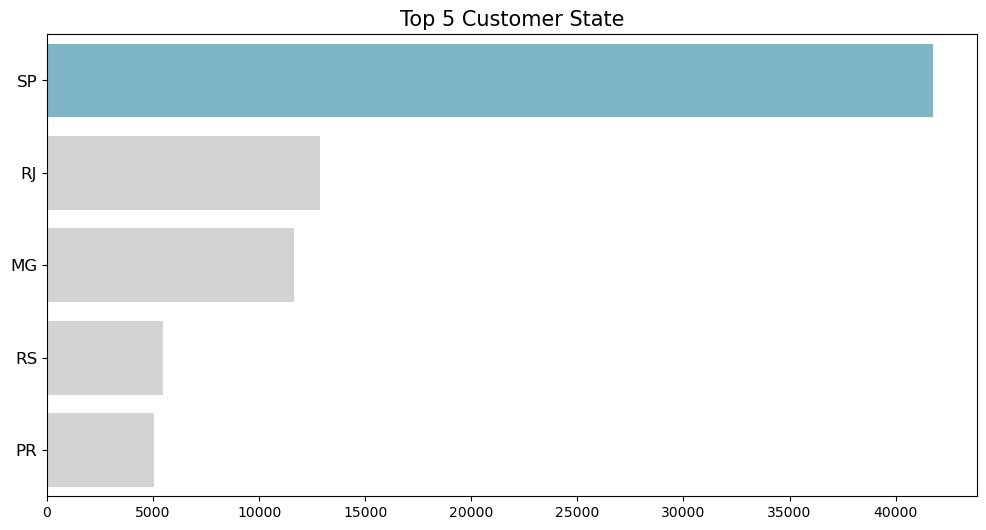

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_id", y="customer_state", data=customer_state_df.sort_values(by="customer_id", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Top 5 Customer State", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

In [163]:
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [164]:
seller_city_df = seller_df.groupby("seller_city").seller_id.count().reset_index()
seller_city_df

,seller_city,seller_id
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


In [165]:
seller_city_df.describe()

,seller_id
count,611.000000
mean,5.065466
std,29.383875
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,694.000000


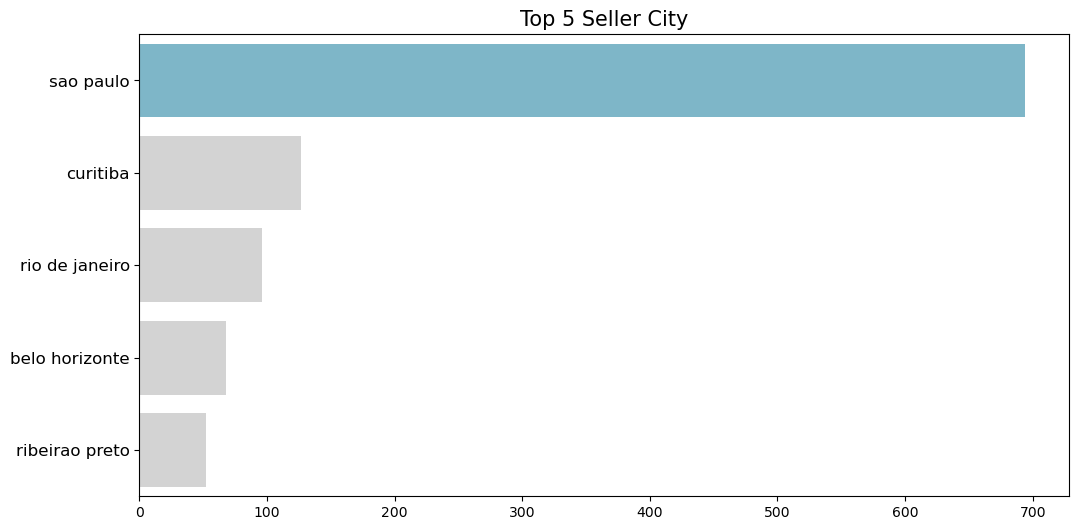

In [166]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="seller_id", y="seller_city", data=seller_city_df.sort_values(by="seller_id", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Top 5 Seller City", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

In [167]:
seller_state_df = seller_df.groupby("seller_state").seller_id.count().reset_index()
seller_state_df

,seller_state,seller_id
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


In [168]:
seller_state_df.describe()

,seller_id
count,23.000000
mean,134.565217
std,385.498240
min,1.000000
25%,2.000000
50%,9.000000
75%,84.500000
max,1849.000000


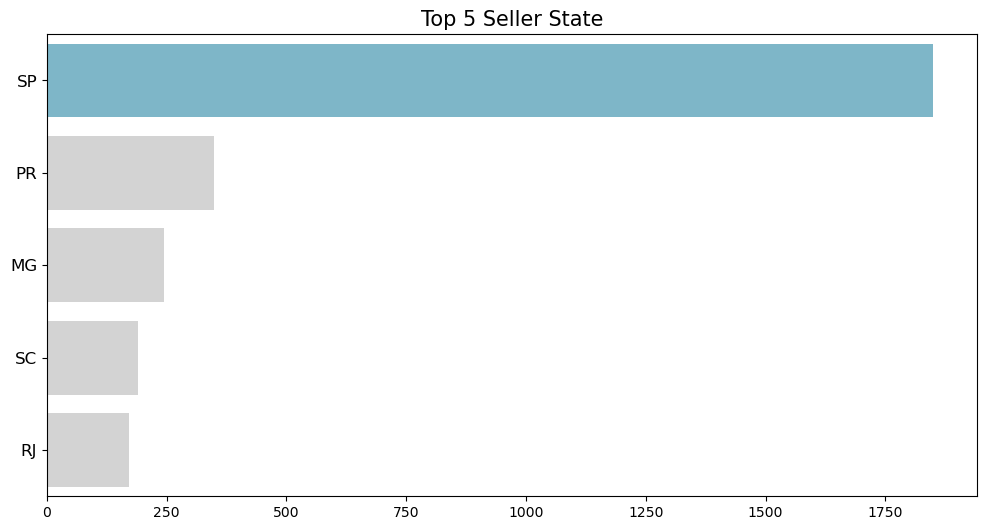

In [169]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="seller_id", y="seller_state", data=seller_state_df.sort_values(by="seller_id", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Top 5 Seller State", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.show()

## 5. Bagaimana tingkat kepuasan customer?

In [170]:
customer_review_df = all_df.groupby("review_score").customer_id.count().reset_index()
customer_review_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
customer_review_df

,review_score,customer_count
0,1.0,15428
1,2.0,4162
2,3.0,9894
3,4.0,22319
4,5.0,66343


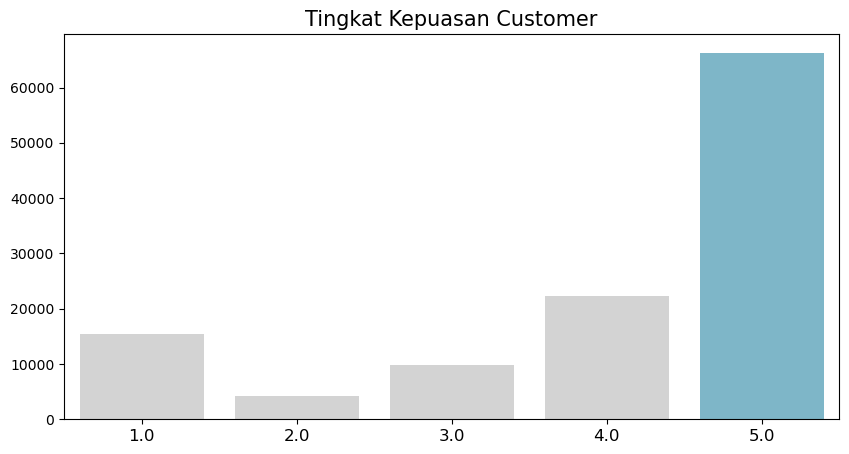

In [171]:
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4"]
sns.barplot(
    y="customer_count", 
    x="review_score",
    data=customer_review_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Tingkat Kepuasan Customer", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [172]:
review_product_df = all_df.groupby("review_score").product_id.count().reset_index()
review_product_df.rename(columns={
    "product_id": "product_count"
}, inplace=True)
review_product_df

,review_score,product_count
0,1.0,14857
1,2.0,4085
2,3.0,9840
3,4.0,22286
4,5.0,66264


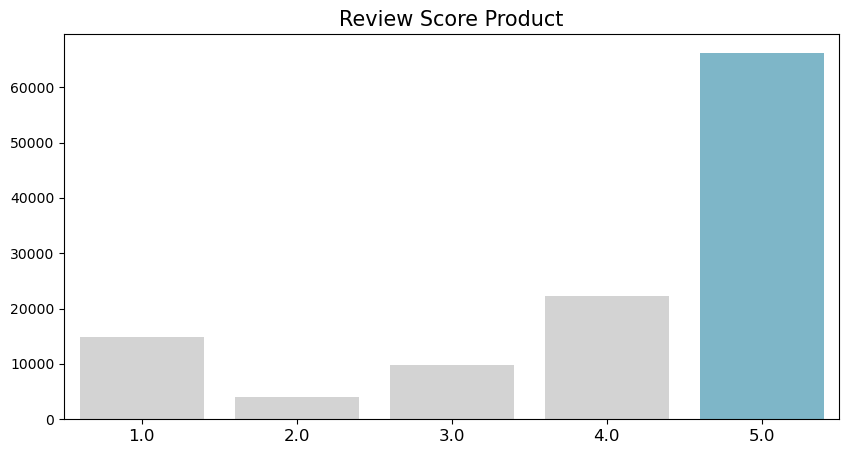

In [173]:
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4"]
sns.barplot(
    y="product_count", 
    x="review_score",
    data=review_product_df.sort_values(by="product_count", ascending=False),
    palette=colors
)
plt.title("Review Score Product", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## 6. Bagaimana penjualan dan revenue untuk masing-masing seller? seller mana saja yang memiliki penjualan dan revenue terbesar dan terkecil?

In [174]:
all_df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
delivery_time                      3421
delivery_estimated_time               0
diff_time                          3421
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_name                       2567
product_name_lenght                2567
product_description_lenght         2567
product_photos_qty                 2567
product_weight_g                   2568
product_length_cm                  2568
product_height_cm                  2568
product_width_cm                   2568


In [175]:
seller_order_count_df = all_df.groupby("seller_id").order_id.count().reset_index()
seller_order_count_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
seller_order_count_df

,seller_id,order_count
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,241
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,59
4,003554e2dce176b5555353e4f3555ac8,1
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,21
3092,ffeee66ac5d5a62fe688b9d26f83f534,14
3093,fffd5413c0700ac820c7069d66d98c89,62


In [176]:
seller_order_count_df.describe()

,order_count
count,3095.000000
mean,38.226171
std,125.390547
min,1.000000
25%,2.000000
50%,8.000000
75%,26.000000
max,2155.000000


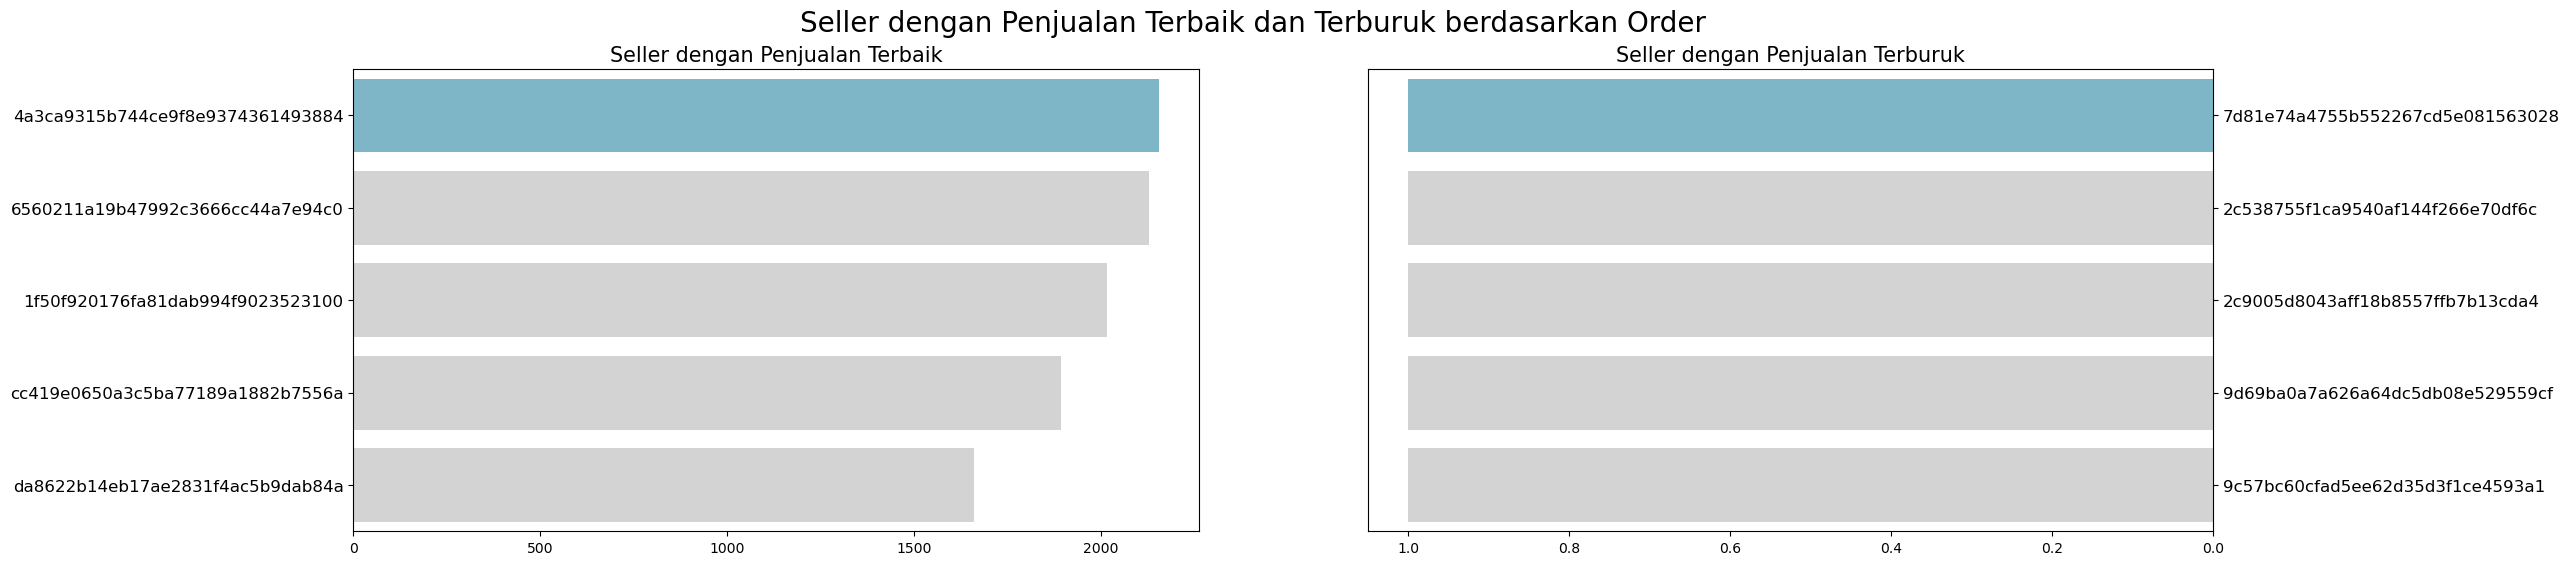

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_count", y="seller_id", data=seller_order_count_df.sort_values(by="order_count",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Seller dengan Penjualan Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_count", y="seller_id", data=seller_order_count_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Seller dengan Penjualan Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Seller dengan Penjualan Terbaik dan Terburuk berdasarkan Order", fontsize=20)
plt.show()

In [178]:
seller_revenue_df = all_df.groupby("seller_id").payment_value.sum().reset_index()
seller_revenue_df.rename(columns={
    "payment_value": "revenue"
}, inplace=True)
seller_revenue_df

,seller_id,revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22
2,001e6ad469a905060d959994f1b41e4f,267.94
3,002100f778ceb8431b7a1020ff7ab48f,2478.33
4,003554e2dce176b5555353e4f3555ac8,139.38
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55
3093,fffd5413c0700ac820c7069d66d98c89,12834.27


In [179]:
seller_revenue_df.describe()

,revenue
count,3095.000000
mean,6596.718107
std,21698.226870
min,12.220000
25%,320.500000
50%,1255.710000
75%,4884.675000
max,512645.190000


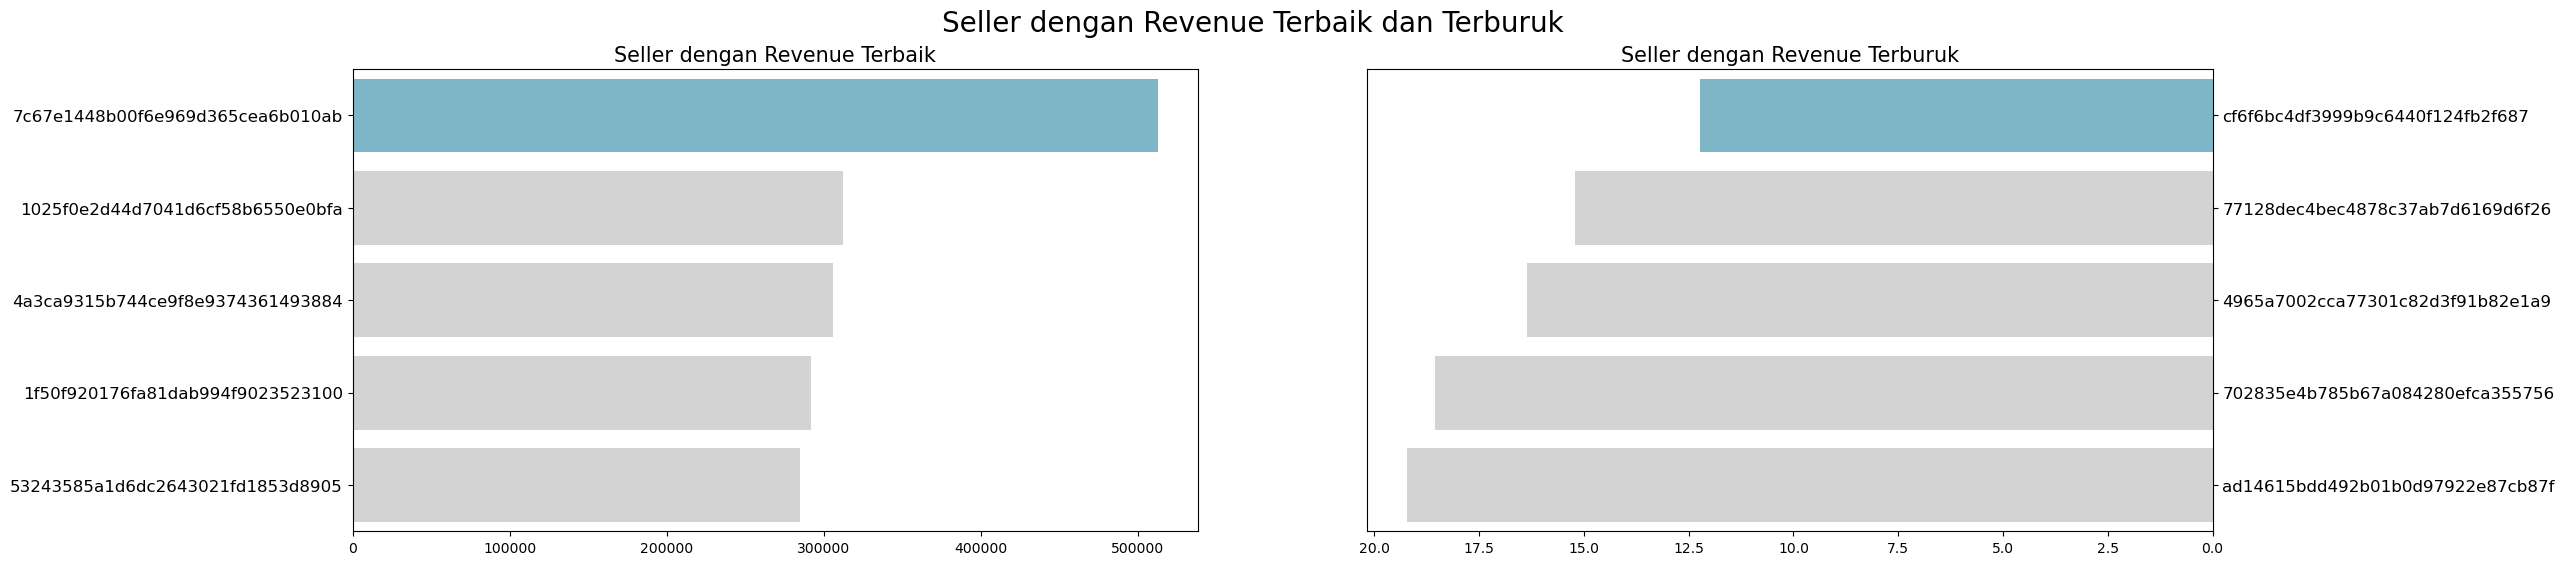

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="revenue", y="seller_id", data=seller_revenue_df.sort_values(by="revenue",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Seller dengan Revenue Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="revenue", y="seller_id", data=seller_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Seller dengan Revenue Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Seller dengan Revenue Terbaik dan Terburuk", fontsize=20)
plt.show()

In [181]:
seller_review_df = all_df.groupby("seller_id").review_score.mean().reset_index()
seller_revenue_df.rename(columns={
    "review_score": "review_mean"
}, inplace=True)
seller_review_df

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.911765
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,4.033898
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.819672


In [182]:
seller_review_df.describe()

,review_score
count,3090.000000
mean,3.972837
std,0.973487
min,1.000000
25%,3.714286
50%,4.166667
75%,4.617081
max,5.000000


In [183]:
seller_review_df[seller_review_df.review_score == seller_review_df.review_score.max()]

,seller_id,review_score
4,003554e2dce176b5555353e4f3555ac8,5.0
7,00ab3eff1b5192e5f1a63bcecfee11c8,5.0
8,00d8b143d12632bad99c0ad66ad52825,5.0
14,01266d4c46afa519678d16a8b683d325,5.0
22,01ed254b9ff8407dfb9d99ba1e17d923,5.0
...,...,...
3056,fd435faa3c0422b60440ea3480d0e77c,5.0
3060,fdf736c18c589ed030e058312203e1b2,5.0
3061,fe19dce63ae80346207c6c55713d1023,5.0
3072,feb793c88d836c3a75efa4b5a3465d70,5.0


In [184]:
seller_review_df[seller_review_df.review_score == seller_review_df.review_score.min()]

,seller_id,review_score
2,001e6ad469a905060d959994f1b41e4f,1.0
12,010da0602d7774602cd1b3f5fb7b709e,1.0
128,0aa124728afc1131dff5655f4c6f487b,1.0
238,1444c08e64d55fb3c25f0f09c07ffcf2,1.0
245,154bdf805377afea75a3bd158e9eab10,1.0
...,...,...
3029,fa7ad8ae9bcb2c4493fdf38e96b1d74f,1.0
3045,fc6295add6f51a0936407ead70c1001d,1.0
3048,fc99f99385ae90f66f01733856fb88c9,1.0
3075,fec6912baad85d41729669edd6b4d3b8,1.0


## 7. Apa saja produk yang memiliki rata-rata review score terbaik dan terburuk?

In [185]:
product_review_df = all_df.groupby("product_name").review_score.mean().reset_index()
product_review_df.rename(columns={
    "review_score": "review_mean"
}, inplace=True)
product_review_df

,product_name,review_mean
0,agro_industry_and_commerce,4.150794
1,air_conditioning,3.969697
2,art,3.935484
3,arts_and_craftmanship,4.125000
4,audio,3.840849
...,...,...
66,stationery,4.188339
67,tablets_printing_image,4.117647
68,telephony,3.948849
69,toys,4.162506


In [186]:
product_review_df.describe()

,review_mean
count,71.000000
mean,4.043931
std,0.295229
min,2.500000
25%,3.942469
50%,4.067368
75%,4.186335
max,4.642857


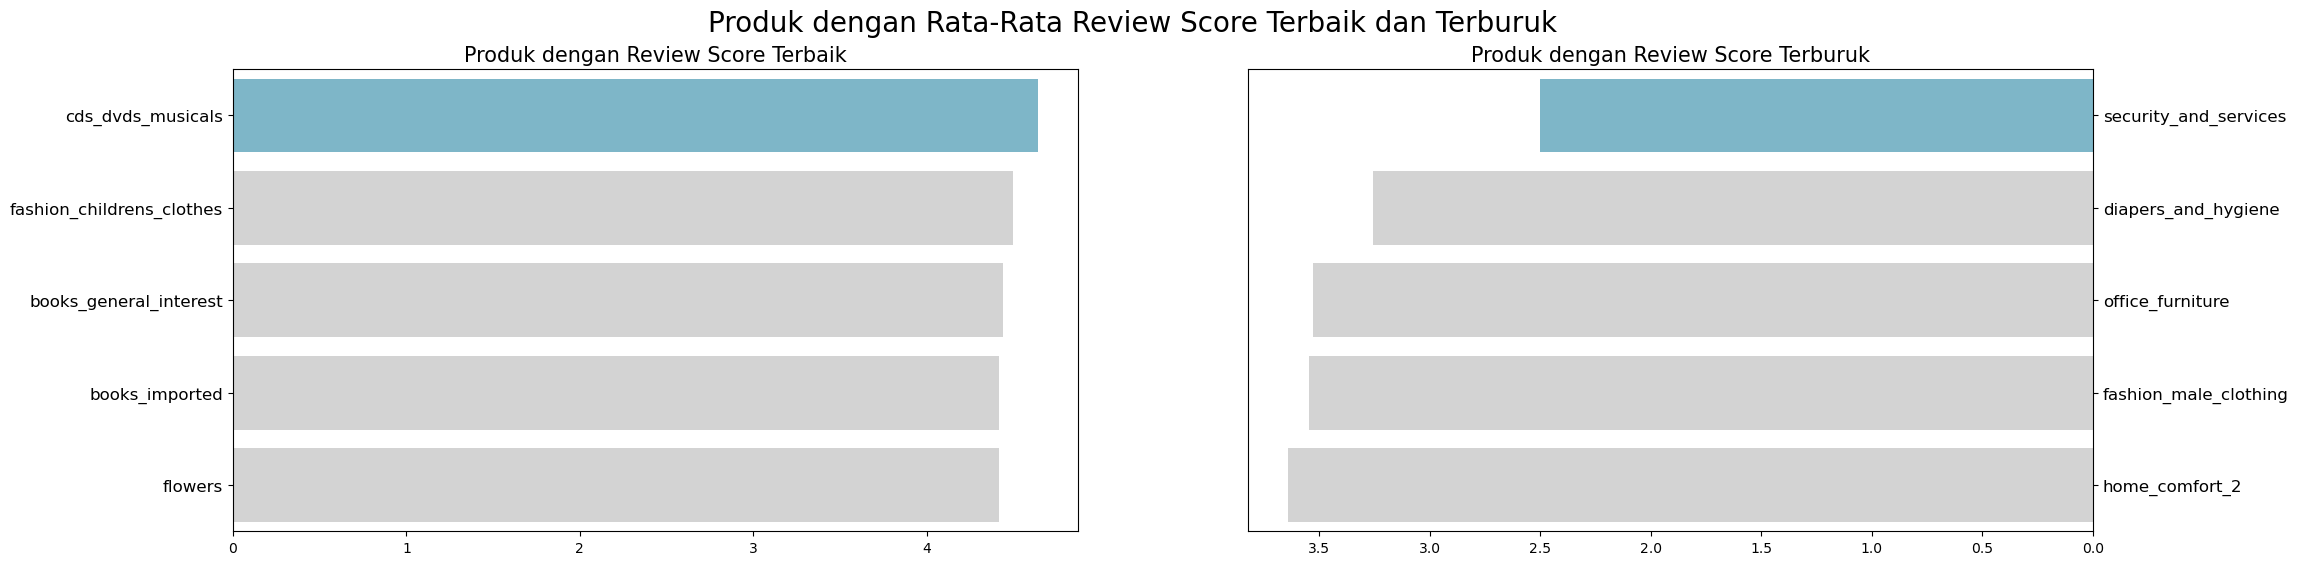

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="review_mean", y="product_name", data=product_review_df.sort_values(by="review_mean",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Review Score Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="review_mean", y="product_name", data=product_review_df.sort_values(by="review_mean", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Review Score Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Produk dengan Rata-Rata Review Score Terbaik dan Terburuk", fontsize=20)
plt.show()

# RFM ANALYSIS

#### RFM Analysis bersumber atau mengacu pada Latihan Data Visulization

In [188]:
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_estimated_time,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23.0,...,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,30.0,...,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37.0,...,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [189]:
all_df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
delivery_time                      3421
delivery_estimated_time               0
diff_time                          3421
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_name                       2567
product_name_lenght                2567
product_description_lenght         2567
product_photos_qty                 2567
product_weight_g                   2568
product_length_cm                  2568
product_height_cm                  2568
product_width_cm                   2568


- Tahap pertama RFM yaitu mendefinisikan frequency, monetary, dan mengambil tanggal order terakhir.
- Recency menunjukkan seberapa baru suatu customer melakukan transaksi yang dihitung dari tanggal order terakhir.
- Frequency menunjukkan seberapa sering atau banyak suatu customer melakukan transaksi yang dihitung dari berapa banyak - order_id yang dilakukan untuk setiap customer_id.
- Monetary menunjukkan seberapa banyak uang yang dikeluarkan suatu customer untuk seluruh transaksi.

In [190]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,81.36
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,63.13
99438,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,214.13
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,1,91.00


Tahap selanjutnya mendefinisikan recency yang dihitung dari tanggal order terakhir pada orders dataset. 

In [191]:
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198
...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29,1,81.36,202
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22,1,63.13,148
99438,ffff42319e9b2d713724ae527742af25,2018-06-13,1,214.13,126
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02,1,91.00,410


Berikut merupakan dataset baru yang berisikan nilai recency, frequency, dan monetary untuk masing-masing customer_id.

In [192]:
rfm_df = rfm_df.drop(columns=["max_order_timestamp"])
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,81.36,202
99437,fffeda5b6d849fbd39689bb92087f431,1,63.13,148
99438,ffff42319e9b2d713724ae527742af25,1,214.13,126
99439,ffffa3172527f765de70084a7e53aae8,1,91.00,410


In [193]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,206.953510,290.272956
std,0.0,622.550183,153.670615
min,1.0,0.000000,0.000000
25%,1.0,62.960000,166.000000
50%,1.0,110.240000,272.000000
75%,1.0,196.520000,400.000000
max,1.0,109312.640000,773.000000


Dari deskripsi rfm_df diatas:
- Seluruh customer_id memiliki nilai frequency yang sama yaitu 1.
- Nilai minimum monetary adalah 0 dan nilai maksimumnya 109312.64.
- Nilai minimum recency adalah 0 dan nilai maksimumnya 773.

#### rfm_df diurutkan dari frequency terkecil.

In [194]:
rfm_df.sort_values(by="frequency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
66299,aa72002446dfbac0691304465c1b982d,1,20.95,612
66298,aa71b21388b99444414a772acde9f6aa,1,127.25,394
66297,aa6ee75a5950e07fa3f543bf48ee608e,1,205.08,163
66296,aa6edca5d83d4c8e9a2262b9847febd6,1,79.63,77


#### rfm_df diurutkan dari monetary terkecil

In [195]:
rfm_df.sort_values(by="monetary", ascending=True).head(5)

,customer_id,frequency,monetary,recency
52277,86dc2ffce2dfff336de2f386a786e574,1,0.00,762
64967,a73c1f73f5772cf801434bf984b0b1a7,1,0.00,44
9908,197a2a6a77da93f678ea0d379f21da0a,1,0.00,50
20653,3532ba38a3fd242259a514ac2b6ae6b6,1,0.00,50
65095,a790343ca6f3fee08112d678b43aa7c5,1,9.59,53


#### rfm_df diurutkan dari monetary terbesar

In [196]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8546,1617b1357756262bfa56ab541c47bc16,1,109312.64,383
73858,bd5d39761aa56689a265d95d8d32b8be,1,45256.00,420
74118,be1b70680b9f9694d8c70f41fa3dc92b,1,44048.00,237
2065,05455dfa7cd02f13d132aa7a6a9729c6,1,36489.24,327
12398,1ff773612ab8934db89fd5afa8afe506,1,30186.00,181


#### rfm_df diurutkan dari recency terkecil atau terbaru

In [197]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,89.71,0
51713,856336203359aa6a61bf3826f7d84c49,1,222.03,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,197.55,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,80.38,16
15595,2823ffda607a2316375088e0d00005ec,1,137.03,18


#### rfm_df diurutkan dari recency terbesar atau terlama

In [198]:
rfm_df.sort_values(by="recency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
3354,08c5351a6aca1c1589a38f244edeee9d,1,272.46,773
40289,683c54fc24d40ee9f8a6fc179fd9856c,1,75.06,772
38013,622e13439d6b5a0b486c435618b2679e,1,40.95,764
52277,86dc2ffce2dfff336de2f386a786e574,1,0.00,762
68946,b106b360fe2ef8849fbbd056f777b4d5,1,109.34,745


## Mengurutkan Customer Berdasarkan RFM

In [199]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34364.5,49721.0,51541.0
1,000161a058600d5901f007fab4c27140,1,67.41,458,16871.5,49721.0,28027.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2882.0,49721.0,74343.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21181.5,49721.0,71313.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,66986.5,49721.0,48470.5


In [200]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34.557677,100.0,51.830734
1,000161a058600d5901f007fab4c27140,1,67.41,458,16.966342,100.0,28.184552
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2.898201,100.0,74.761416
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21.300570,100.0,71.713881
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,67.363060,100.0,48.742973


In [201]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']]

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.55
3,0002414f95344307404f0ace7a26f1d5,3.60
4,000379cdec625522490c315e70c7a9fb,3.29
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2.94
99437,fffeda5b6d849fbd39689bb92087f431,2.72
99438,ffff42319e9b2d713724ae527742af25,4.24
99439,ffffa3172527f765de70084a7e53aae8,2.76


## Segmentasi Customer
Customer dibagi menjadi 5 tipe yaitu Top Customer, High Value Customer, Medium Value Customer, Low Value Customer, dan Lost Customer dengan syarat yang digunakan sebagai berikut.

In [202]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']]

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.55,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.60,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.29,Medium value customer
...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2.94,Low value customers
99437,fffeda5b6d849fbd39689bb92087f431,2.72,Low value customers
99438,ffff42319e9b2d713724ae527742af25,4.24,High value customer
99439,ffffa3172527f765de70084a7e53aae8,2.76,Low value customers


In [203]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16113
1,Low value customers,41901
2,Medium value customer,34713
3,Top customers,5640
4,lost customers,1074


In [204]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

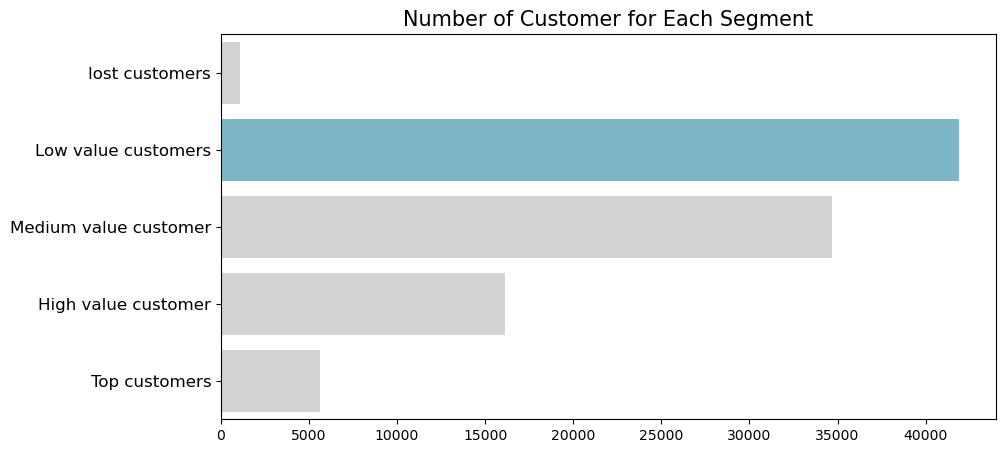

In [205]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari hasil segmentasi customer menggunakan RFM Analysis didapatkan hanya sedikit customer yang menjadi Top Customer dan mayoritas customer merupakan Low Value Customer.

# Conclusion

### 1. Bagaimana performa penjualan dan revenue perusahaan?
- Dari eksplorasi dan visualisasi data didapatkan kesimpulan bahwa penjualan terbaik terjadi pada bulan November 2017 yang menunjukkan order sebanyak 7544 dan penjualan terburuk terjadi pada bulan November 2016 yang menunjukkan tidak ada order yang masuk sama sekali. Rata-rata penjualan selama dua tahun adalah 3824.7.
- Selain itu, dilihat juga performa perusahaan dari revenue selama 2 tahun. Revenue terbesar yang didapat terjadi pada bulan November 2017 sebesar 1599444.18 mata uang Brazil dan revenue terkecil sebesar 0 mata uang Brazil yang terjadi pada bulan November 2016. Rata-rata revenue yang didapatkan selama dua tahun adalah 787335.6 mata uang Brazil.
- Jika dilihat secara sekilas dari kedua grafik penjualan dan revenue selama 2016-2018 menunjukkan pola dan bentuk yang sama begitu juga pada penjelasa penjualan dan revenue terbaik dan terburuk terjadi pada bulan yang sama, hal ini menunjukkan penjualan dan revenue memiliki hubungan linear yaitu jika penjualan baik maka revenue perusahaan juga menunjukkan angka yang baik pula begitupun sebaliknya.

### 2. Apa saja produk yang paling banyak dan paling sedikit terjual?
- Produk yang paling banyak terjual adalah produk yang berada dalam kategori bed_bath_table dengan banyak penjualan sebesar 11823 order_count. Produk yang paling banyak terjual diikuti oleh produk dalam kategori health_beauty, sport_leisure, furniture_decor, dan computers_accessories.
- Produk yang paling sedikit terjual adalah produk yang berada dalam kategori security_and_service dengan banyak penjualan sebesar 2 order_count. Produk yang paling sedikit terjual selanjutnya adalah fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, dan art_and_craftmanship.

### 3. Apa saja produk yang paling banyak dan paling sedikit memberikan revenue?
- Produk yang paling banyak memberikan revenue adalah produk dalam kategori bed_bath_table sebesar 1712554 mata uang Brazil dan diikuti oleh kategori produk health_beauty, computers_accessories, furniture_decor, dan watches_gift.
- Produk yang paling sedikit memberikan revenue adalah produk dalam kategori security_and_services sebesar 324.51 mata uang Brazil dan diikuti oleh fashion_childrens_clothes, cds_dvds_musicals, home_comfort_2, dan flowers.

### 4. Bagaimana demografi customer dan seller?
- 5 kota teratas yang paling banyak terdapat customer adalah Sao Paulo dengan total 15540 customer_id diikuti oleh Rio de Janeiro, Belo Horizonte, Brasilia, dan Curitiba. Adapun 5 state teratas dengan customer terbanyak adalah state SP, RJ, MG, RS, dan PR.
- 5 kota teratas yang paling banyak terdapat seller adalah Sao Paulo dengan 694 seller_id diikuti oleh Curitiba, Rio de Janeiro, Belo Horizonte, dan Ribeirao Preto. Adapun 5 state teratas dengan seller_id terbanyak adalah state SP, PR, MG, SC, dan RJ.

### 5. Bagaimana tingkat kepuasan customer?
- Review score yang diperoleh sangat beragam dengan mayoritas customer_id memberikan ulasan atau review yang baik. Ada sebanyak 6634 cutomer_id yang memberikan review score 5 dan di satu sisi sebanyak 15428 customer_id memberikan review score terendah yaitu 1.
- Selain itu, ditinjau juga review score berdasarkan product_id. Sebanyak 66264 product_id memiliki review score terbaik dan 14857 product_id memiliki review score terburuk.

### 6. Bagaimana penjualan dan revenue untuk masing-masing seller? seller mana saja yang memiliki penjualan dan revenue paling besar dan paling kecil?
- Penjualan terbanyak yang dilakukan oleh seller adalah sebanyak 2155 order_count sedangkan penjualan terendah adalah 1 order_count dan rata-rata penjualan seluruh seller adalah 38 order_count.
- Revenue terbesar yang didapatkan oleh seller sebesar 512645.2 mata uang Brazil sedangkan revenue terendah adalah 12.22 mata uang Brazil dan rata-rata revenue seluruh seller adalah 6596.7 mata uang Brazil.
- Selain itu, ditinjau juga performa seller dari review_score yang diterima. Terdapat 507 seller yang menerima review score terbaik dan 151 seller yang menerima review score terburuk serta rata-rata review score yang diterima seluruh seller adalah 3.973.

### 7. Produk mana saja yang memiliki rata-rata review score paling baik dan paling kecil?
- Produk yang paling banyak menerima review baik adalah kategori produk cds_dvds_musicals dengan rata-rata review score sebesar 4.6 yang diikuti oleh kategori produk fashion_childrens_clothes, books_general_interest, books_imported, dan flowers.
- Produk yang paling banyak menerima review buruk adalah kategoru produk security_and_services dengan rata-rata review score sebesar 2.5 yang diikuti oleh kategori produk diapers_and_hygiene, office_furniture, fashion_male_clothing, dan home_comfort_2.
- Rata-rata review score untuk keseluruhan produk adalah 4.